LOAN APPLICATION- STATUS PREDICTION

Since, this is a classification project, we import necessary libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

Import Dataset from GitHub

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- We can note, there are several null cells.
- Let's tackle this using Imputers after we convert are object columns to integers.

In [6]:
df = df.drop_duplicates()
df.shape

(614, 13)

No duplicates

Convert target column to binary float values

In [7]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [8]:
lsta = []
for i in df['Loan_Status']:
    if i == 'N':
        lsta.append(0)
    else:
        lsta.append(1)
        
df['Loan_Status']=lsta
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


Now, Let's convert our categorical columns to float using label encoder

In [9]:
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [10]:
for i in categorical_columns:
    print(df[i].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lab = LabelEncoder()

In [13]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Now, that we have labeled our categorical columns, Let's use Iterative Imputer to fill the null values

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [15]:
ii = IterativeImputer()

In [16]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
iter_col = pd.DataFrame(ii.fit_transform(df[['LoanAmount','Loan_Amount_Term','Credit_History']]),
                        columns = ['iLoanAmount','iLoan_Amount_Term','iCredit_History'])

df = df.join(iter_col)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,iLoanAmount,iLoan_Amount_Term,iCredit_History
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.497683,360.0,1.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0


Now, we drop the unnecessary columns

In [18]:
drop_columns = ['Loan_ID','LoanAmount','Loan_Amount_Term','Credit_History']

In [19]:
df = df.drop(columns = drop_columns,axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,iLoanAmount,iLoan_Amount_Term,iCredit_History
0,1,0,0,0,0,5849,0.0,2,1,146.497683,360.0,1.0
1,1,1,1,0,0,4583,1508.0,0,0,128.000000,360.0,1.0
2,1,1,0,0,1,3000,0.0,2,1,66.000000,360.0,1.0
3,1,1,0,1,0,2583,2358.0,2,1,120.000000,360.0,1.0
4,1,0,0,0,0,6000,0.0,2,1,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,0,1,71.000000,360.0,1.0
610,1,1,3,0,0,4106,0.0,0,1,40.000000,180.0,1.0
611,1,1,1,0,0,8072,240.0,2,1,253.000000,360.0,1.0
612,1,1,2,0,0,7583,0.0,2,1,187.000000,360.0,1.0


In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Loan_Status          0
iLoanAmount          0
iLoan_Amount_Term    0
iCredit_History      0
dtype: int64

In [21]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,iLoanAmount,iLoan_Amount_Term,iCredit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,1.037459,0.687296,146.411483,341.997269,0.842151
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,0.787482,0.463973,84.037483,64.372494,0.349683
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,1.000000,1.000000,129.000000,360.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,2.000000,1.000000,164.750000,360.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,2.000000,1.000000,700.000000,480.000000,1.000000


We can see some pretty obvious outliers in ApplicantIncome and CoapplicantIncome columns. We will be treating those later

Now that we have cleaned our dataset, we are ready to now begin visualizing it

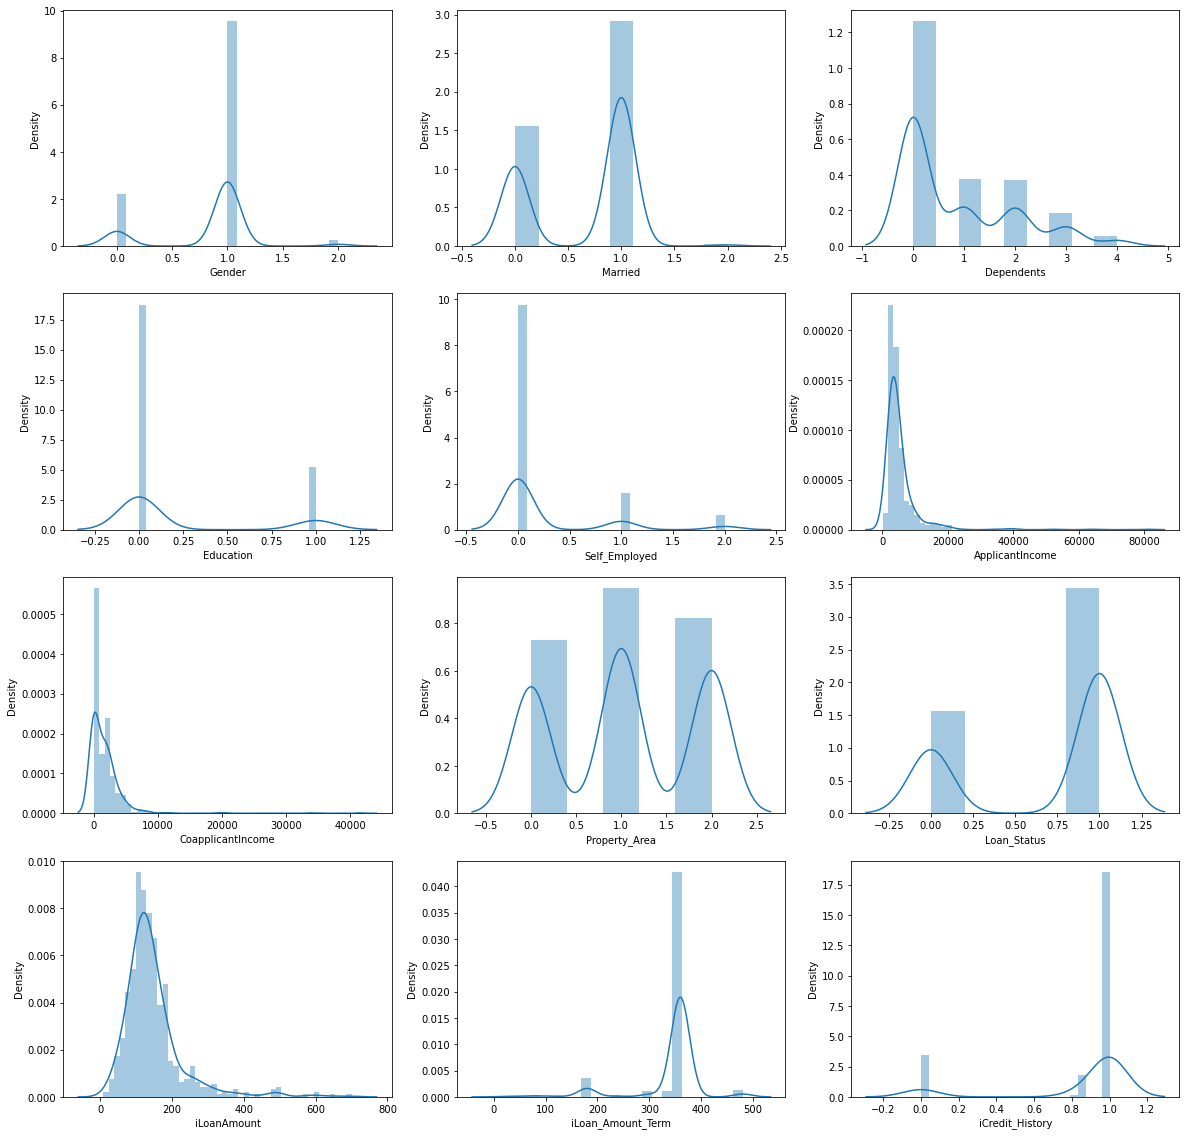

In [22]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

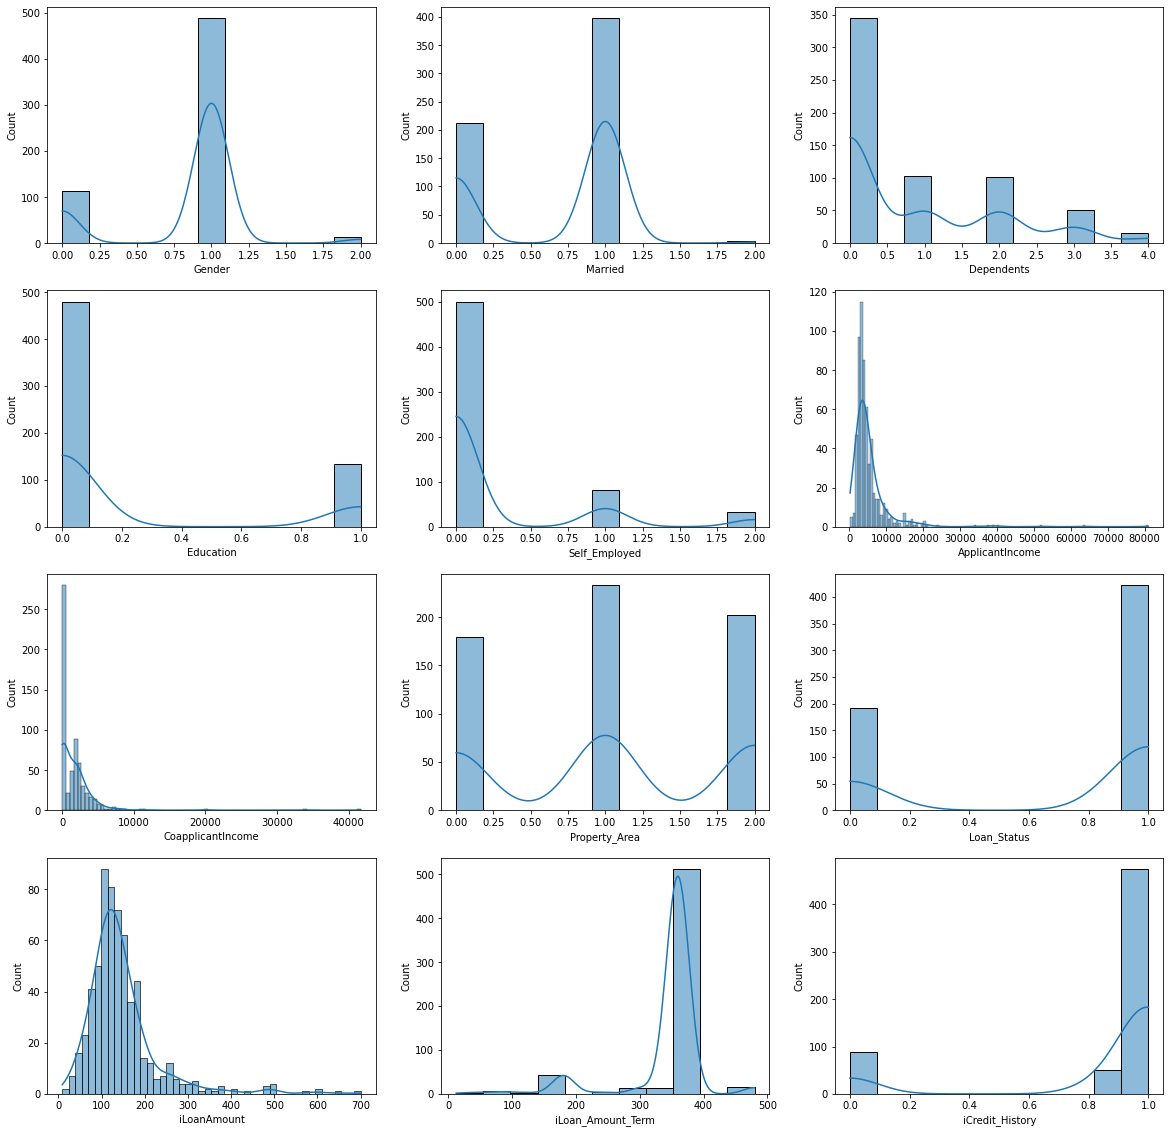

In [23]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

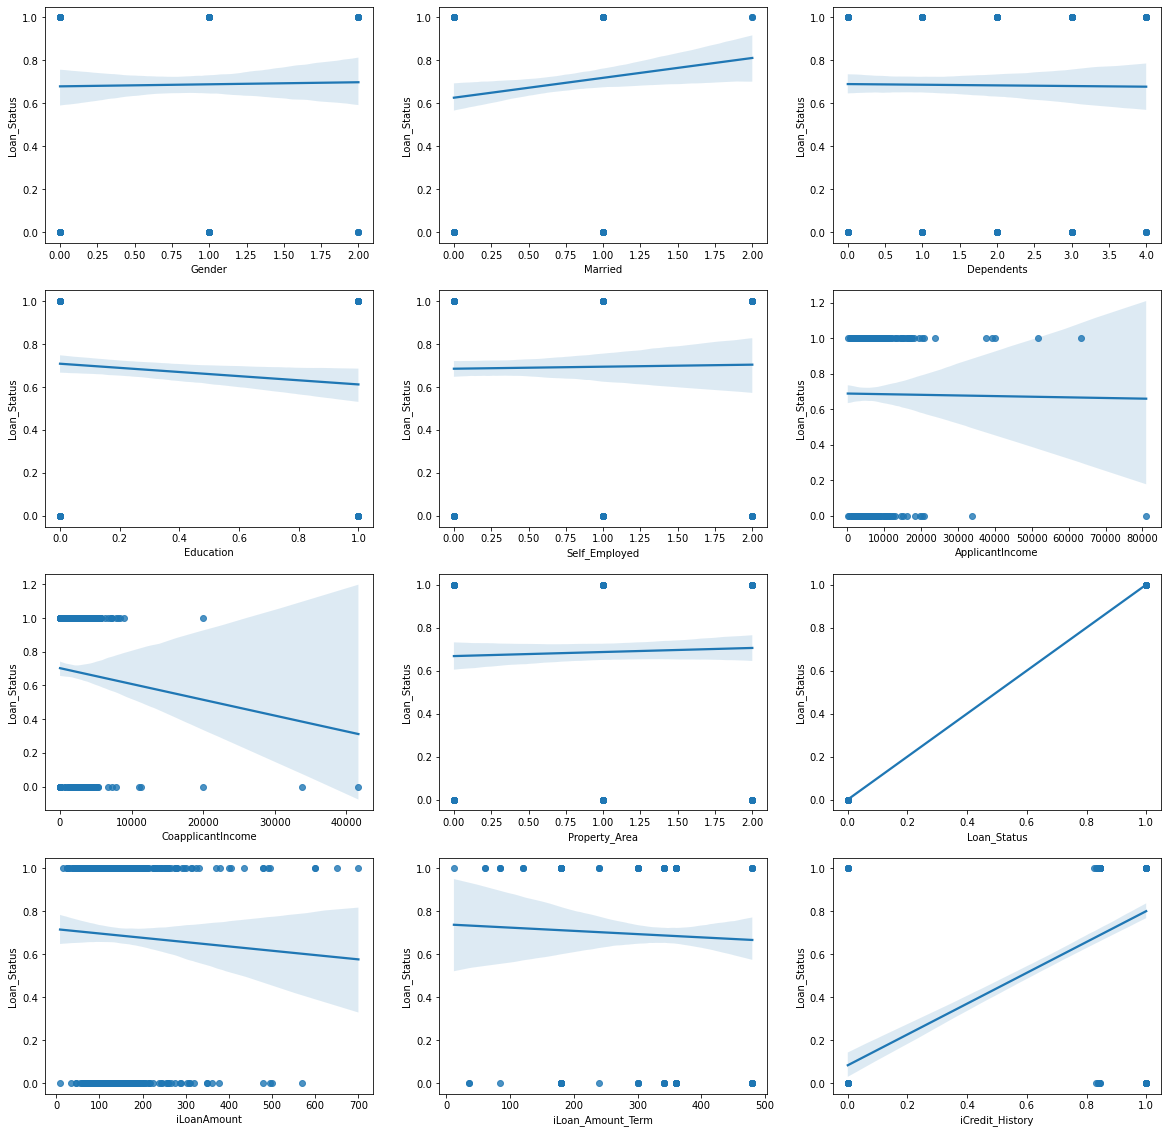

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.regplot(x=column,y='Loan_Status',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

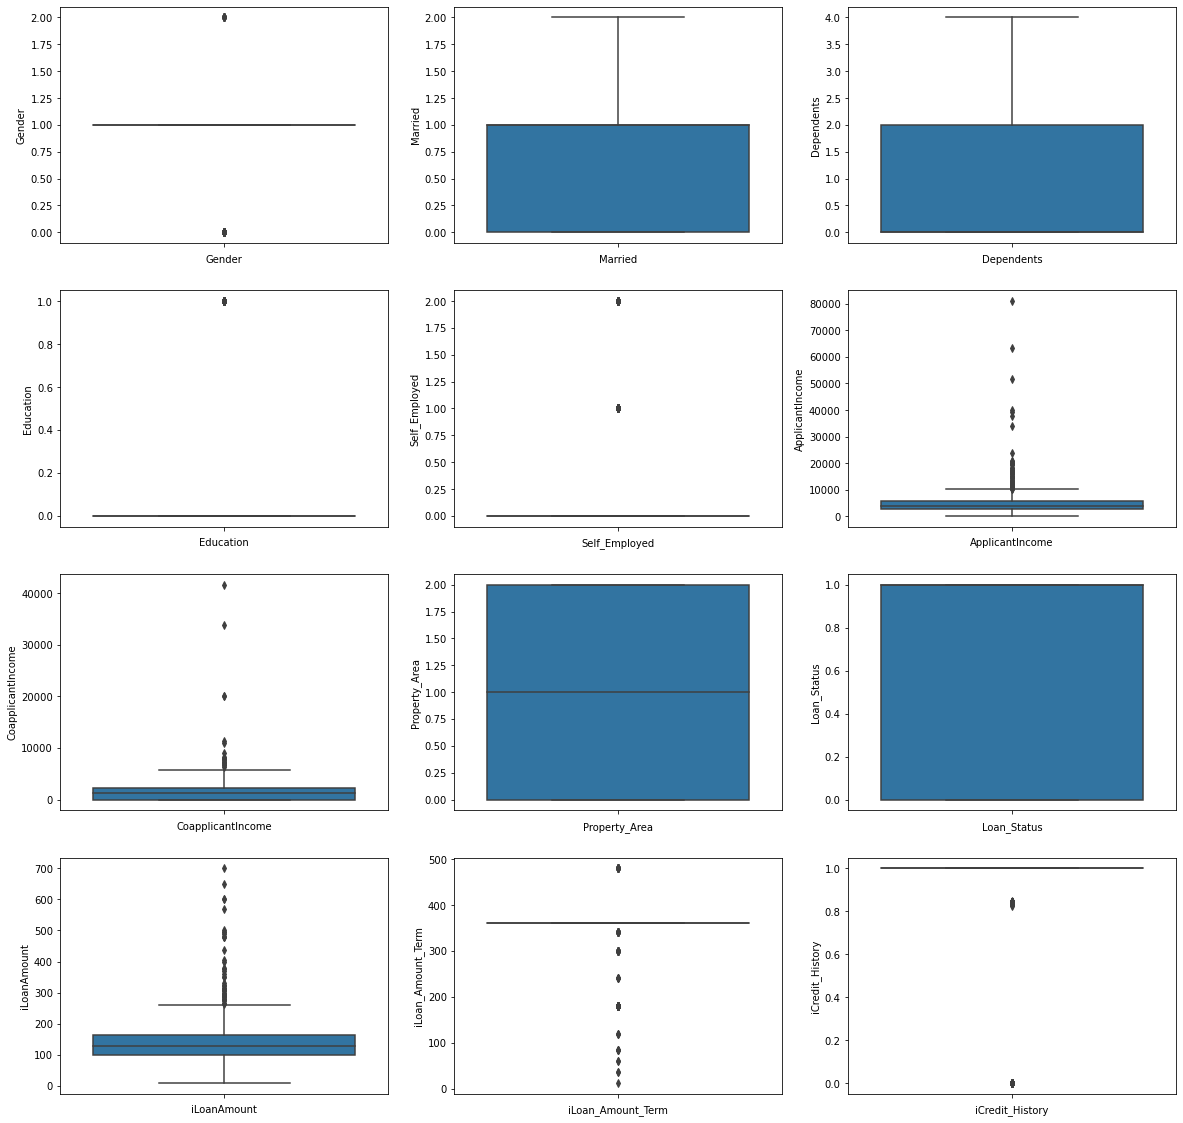

In [25]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [26]:
from scipy.stats import zscore

z_score = zscore(df[['ApplicantIncome','CoapplicantIncome','iLoanAmount','iLoan_Amount_Term']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(577, 12)

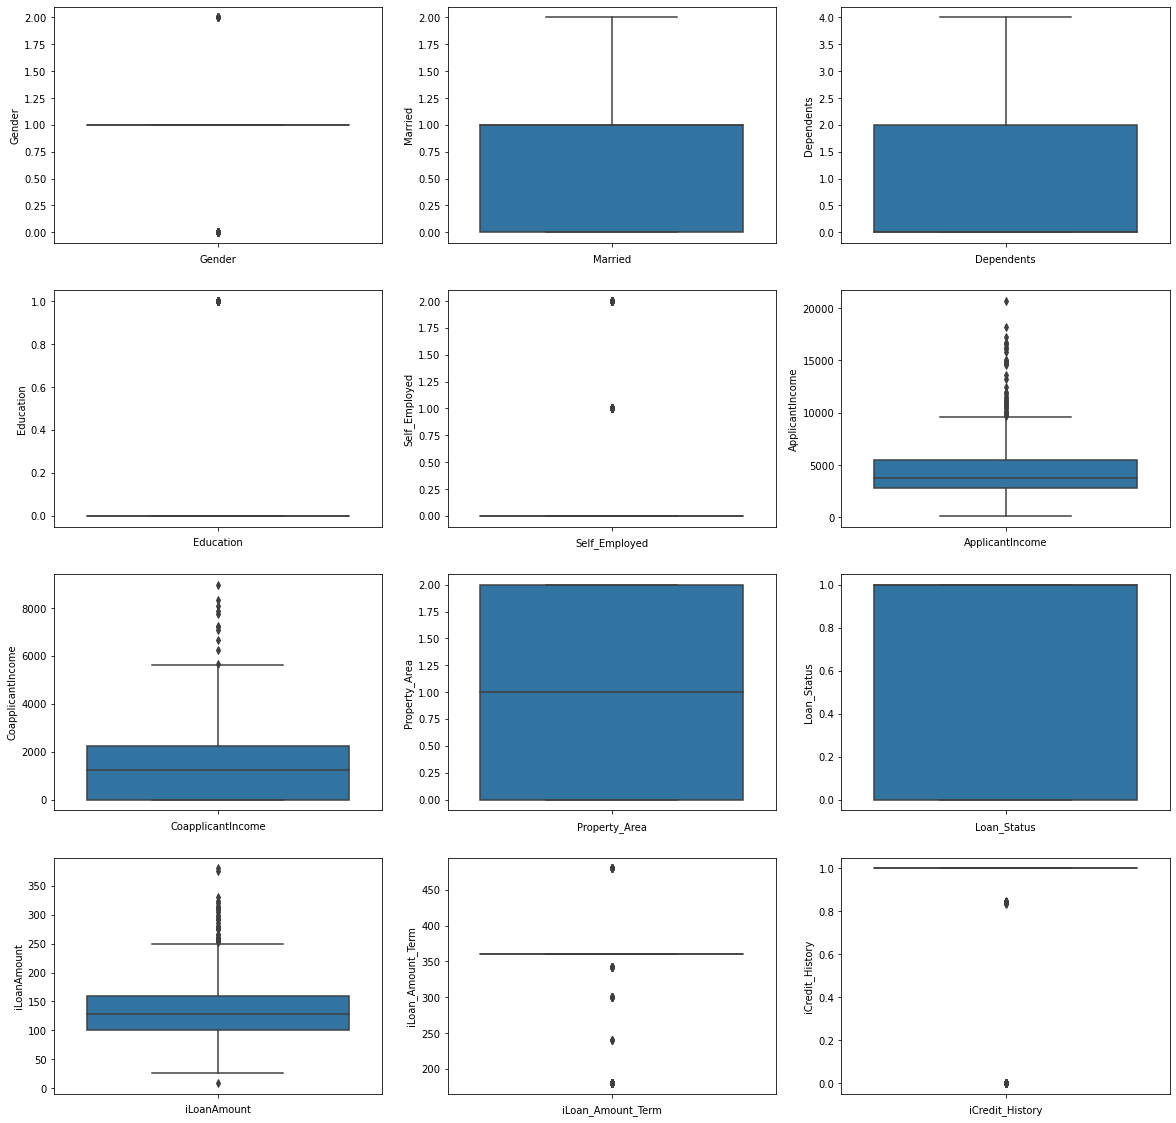

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see decrease in outliers, I will not be removing them further to maintain >90% of our original dataset

Let's check the heatmap for any multi-collinearity problems

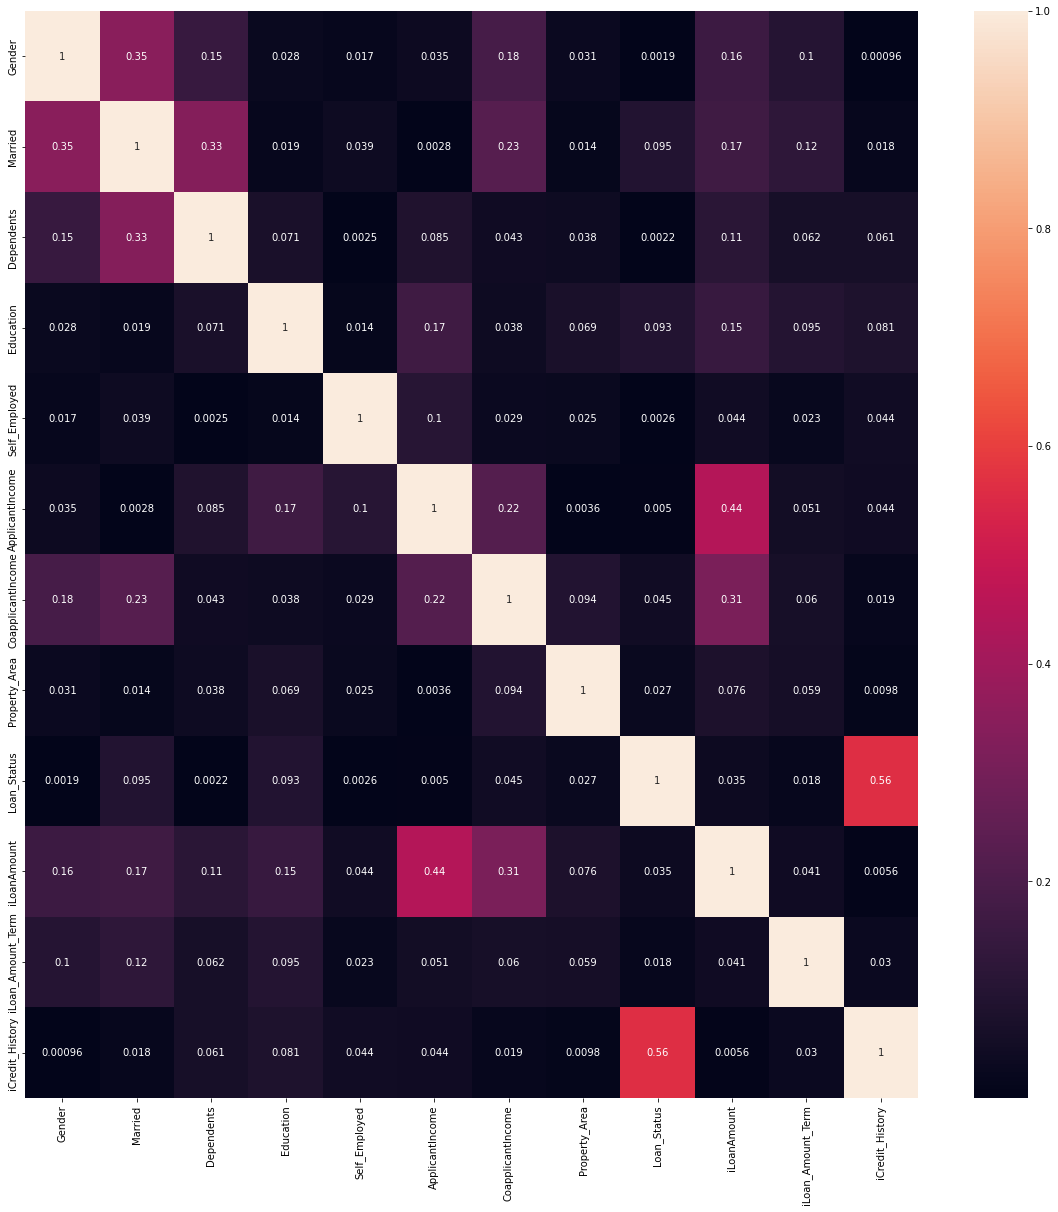

In [28]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

No major Collinarity indicators, We do not need to drop any cplumns here.

In [29]:
df.skew()

Gender              -0.991250
Married             -0.517759
Dependents           1.134133
Education            1.306588
Self_Employed        2.274082
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
Property_Area       -0.055332
Loan_Status         -0.822635
iLoanAmount          1.113176
iLoan_Amount_Term   -2.076826
iCredit_History     -1.922037
dtype: float64

Let's seperate our dataset into featires and target columns

In [30]:
x = df.drop(columns = ['Loan_Status'])
y = df.Loan_Status

In [31]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,iLoanAmount,iLoan_Amount_Term,iCredit_History
0,1,0,0,0,0,5849,0.0,2,146.497683,360.0,1.0
1,1,1,1,0,0,4583,1508.0,0,128.000000,360.0,1.0
2,1,1,0,0,1,3000,0.0,2,66.000000,360.0,1.0
3,1,1,0,1,0,2583,2358.0,2,120.000000,360.0,1.0
4,1,0,0,0,0,6000,0.0,2,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,0,71.000000,360.0,1.0
610,1,1,3,0,0,4106,0.0,0,40.000000,180.0,1.0
611,1,1,1,0,0,8072,240.0,2,253.000000,360.0,1.0
612,1,1,2,0,0,7583,0.0,2,187.000000,360.0,1.0


In [32]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int64

Using Select Percentile to select best features

In [33]:
from sklearn.feature_selection import SelectPercentile, chi2

In [34]:
SPercentile = SelectPercentile(score_func = chi2,percentile = 90)
SPercentile = SPercentile.fit(x,y)

In [35]:
cols = SPercentile.get_support(indices=True)
print('Feature Index: ',cols)

features = x.columns[cols]
print('Features: ',list(features))

Feature Index:  [ 1  3  4  5  6  7  8  9 10]
Features:  ['Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'iLoanAmount', 'iLoan_Amount_Term', 'iCredit_History']


In [36]:
df_scores = pd.DataFrame({'features':x.columns,'Chi2Score':SPercentile.scores_, 'pValue':SPercentile.pvalues_})

df_scores.sort_values(by = 'Chi2Score',ascending = False)

,features,Chi2Score,pValue
6,CoapplicantIncome,2240.097408,0.000000e+00
5,ApplicantIncome,27.168552,1.864673e-07
10,iCredit_History,27.149421,1.883215e-07
8,iLoanAmount,16.607334,4.597290e-05
3,Education,3.829168,5.036793e-02
1,Married,1.859818,1.726458e-01
9,iLoan_Amount_Term,1.460829,2.267983e-01
7,Property_Area,0.244905,6.206856e-01
4,Self_Employed,0.004636,9.457169e-01
2,Dependents,0.004067,9.491484e-01


In [37]:
df.skew()

Gender              -0.991250
Married             -0.517759
Dependents           1.134133
Education            1.306588
Self_Employed        2.274082
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
Property_Area       -0.055332
Loan_Status         -0.822635
iLoanAmount          1.113176
iLoan_Amount_Term   -2.076826
iCredit_History     -1.922037
dtype: float64

In [39]:
x = df[features]
y = df.Loan_Status

In [40]:
x

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,iLoanAmount,iLoan_Amount_Term,iCredit_History
0,0,0,0,5849,0.0,2,146.497683,360.0,1.0
1,1,0,0,4583,1508.0,0,128.000000,360.0,1.0
2,1,0,1,3000,0.0,2,66.000000,360.0,1.0
3,1,1,0,2583,2358.0,2,120.000000,360.0,1.0
4,0,0,0,6000,0.0,2,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,0,71.000000,360.0,1.0
610,1,0,0,4106,0.0,0,40.000000,180.0,1.0
611,1,0,0,8072,240.0,2,253.000000,360.0,1.0
612,1,0,0,7583,0.0,2,187.000000,360.0,1.0


Use Power Transformer to reduce skewness

In [41]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
x_scaled = scaler.fit_transform(x.values)
x_scaled

array([[-1.32631284, -0.54196123, -0.46339282, ...,  0.31757167,
         0.14268192,  0.515163  ],
       [ 0.68893439, -0.54196123, -0.46339282, ..., -0.01585458,
         0.14268192,  0.515163  ],
       [ 0.68893439, -0.54196123,  2.1515352 , ..., -1.44310851,
         0.14268192,  0.515163  ],
       ...,
       [ 0.68893439, -0.54196123, -0.46339282, ...,  1.83810927,
         0.14268192,  0.515163  ],
       [ 0.68893439, -0.54196123, -0.46339282, ...,  0.96157131,
         0.14268192,  0.515163  ],
       [-1.32631284, -0.54196123,  2.1515352 , ...,  0.07722009,
         0.14268192, -2.22535383]])

Now, for accurate predictions, we need to balance our target variable

Check balance using Counter

In [43]:
from collections import Counter
Counter(y)

Counter({1: 398, 0: 179})

We can see our target variable is somewhat imbalanced and we need to balance it

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
x_train1,x_test,y_train1,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [46]:
Counter(y_train1)

Counter({1: 313, 0: 148})

In [47]:
sm = SMOTE(sampling_strategy=0.85)

In [48]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({1: 313, 0: 148}) 
Classes after fitCounter({1: 313, 0: 266}) 


Now that we have balanced our target variable, we can begin Model Training and Testing

In [49]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [50]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False: 
        pred= clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [51]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 76.34%

 ======TESTING RESULT======
Accuracy Score: 76.72%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.59      0.42      0.49        31
           1       0.81      0.89      0.85        85

    accuracy                           0.77       116
   macro avg       0.70      0.66      0.67       116
weighted avg       0.75      0.77      0.75       116



In [52]:
pred = lr.predict(x_test)

Confusion Matrix

In [53]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[13, 18],
       [ 9, 76]], dtype=int64)

We can note that we are getting training accuracy of 76.34% and Testing accuracy of 76.72% with Logistic Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [54]:
from sklearn.svm import SVC

In [55]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [56]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
svc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Check Training Accuracies for other models:

In [57]:
print(lr.score(x_train,y_train))
print(knn.score(x_train,y_train))
print(dec.score(x_train,y_train))
print(ran.score(x_train,y_train))
print(svc.score(x_train,y_train))
print(xgb.score(x_train,y_train))

0.7633851468048359
0.8497409326424871
1.0
1.0
0.8082901554404145
1.0


Check Testing Accuracies for other models:

In [58]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(svc.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.7672413793103449
0.7586206896551724
0.7241379310344828
0.8275862068965517
0.7758620689655172
0.7413793103448276


Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

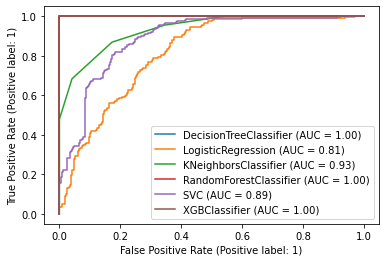

In [59]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

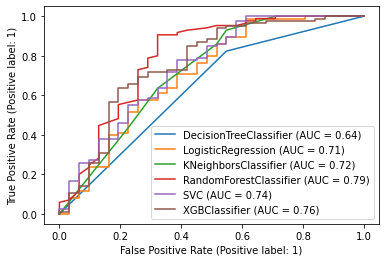

In [60]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

Best Perfoming Models: XGB, SVC and Random Forest

- Log Reg and SVC are the most consistent model
- Random Forest is the model with best accuracy amongst the 3 but least consistency
- SVC is consistent as well as has higher accuracy than Log Reg

Therefore, SVC is my best perfoming model

Let's perform some hyperparameter tuning to try and increase the model performance further

In [61]:
params = {'C':[1,5,10,15,20,25,30],
         'gamma':[0.001,0.01,0.02,0.002],
        }

In [62]:
grid = GridSearchCV(svc, param_grid = params, n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15, 20, 25, 30],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [63]:
print('best parameters: ',grid.best_params_)

best parameters:  {'C': 1, 'gamma': 0.002}


In [64]:
svc_grid = grid.best_estimator_
svc_grid.fit(x_train,y_train)

SVC(C=1, gamma=0.002)

In [65]:
metric_score(svc_grid,x_train,x_test,y_train,y_test,train = True)
metric_score(svc_grid,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 77.03%

 ======TESTING RESULT======
Accuracy Score: 80.17%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.75      0.39      0.51        31
           1       0.81      0.95      0.88        85

    accuracy                           0.80       116
   macro avg       0.78      0.67      0.69       116
weighted avg       0.79      0.80      0.78       116



We can see increased model performance after Tuning, So we will use our Hypertuned SVC model for predictions as our best model.

Random Forest or LogReg models can also be used if accuracy or consistency (respectively) take precedence.